# Wind Energy Data Model

## Project Description
A research engineer is investigating the use of a windmill to generate electricity in different provinces in Canada. She has collected data on the DC output from these windmills and the corresponding wind velocity. The data are listed in "Windmill.csv".
Build a model to predict the DC output for a given wind speed in mph (mile per hour).

## Importing the Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Data and Checking

In [30]:
dataset = pd.read_csv('Windmill.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [31]:
dataset

,Location,Wind Velocity(mph),DC Output
0,Manitoba,2.45,0.423
1,Manitoba,2.70,0.500
2,Manitoba,2.90,0.653
3,Manitoba,3.05,0.558
4,Manitoba,3.40,1.057
5,Newfoundland,3.60,1.137
6,Newfoundland,3.95,1.144
7,Newfoundland,4.10,1.194
8,Newfoundland,4.60,1.562
9,Alberta,5.00,1.582


In [32]:
# some checking of X and y

<font color=red> Note:<font color=blue>StandardScaler only accept the data in Matrix format. So, we need to reshape the vecctor y which is 1D array to a matrix of 25x1

In [33]:
y = y.reshape(len(y),1)

## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR Model on the Dataset
<font color=blue> Please note, here we chose the rbf Kernel, which is the most common. We may try other Kernels such as:<br>
    - Polynomial Kernel (poly) <br>
    - Gaussian Radial Basis Function (RBF) Kernel<br>
    - Linear Kernel (linear),<br>
    - sigmoid Kernel (sigmoid),<br>
    
<font color=red>This topic will be covered in SVM later. 

In [35]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\jtsan\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Using the Model to Predict the DC Output

In [40]:
# Select a wind speed and predict the DC Output
NewX=[[9]]
# we need to scale it
scaledX = sc_X.fit_transform(NewX)
# we predict the output
result = regressor.predict(scaledX)
# the "Result" is in scaled format; we need to inverse it to the actual value.
ActualResult = sc_y.inverse_transform(result)
print("The DC Output will be", ActualResult)


The DC Output will be [1.83568887]


## Visualising the SVR Results

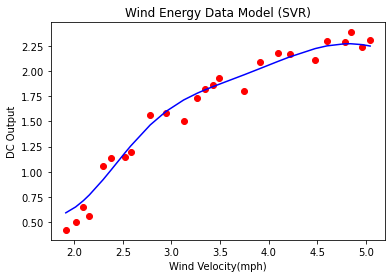

In [37]:
# Note, we need to plot the actual values not the scaled data. So, we 
#need to inverse the scaled data back to original.
y_byModel = regressor.predict(X)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(y_byModel), color='blue')
plt.title('Wind Energy Data Model (SVR)')
plt.xlabel('Wind Velocity(mph)')
plt.ylabel('DC Output')
plt.show()